# Regression 

Değerler Arası bir ilişki yakalamak içindir. Makine öğrenmesi için regresyon çok önemli bir uygulamadır. Regresyon ve classification algoritmaları makine  öğrenmesinin çok temel ve yaygın uygulamalarıdır. Bir çok çalışma bu sistemlere dayanır ancak elbette biz şuan daha giriş seviyesinde örnekler üzerinde konuşacağız. Bir çok regresyon uygulaması çeşidi vardır.

# Linear Regresyon

Data noktaların içinden geçen bir doğru çizerek datadaki trendi tespit etmeyi hedefler. Bu değerleri tahmin etmek için kullanılablir. 
Bir data grubu oluşturalım.

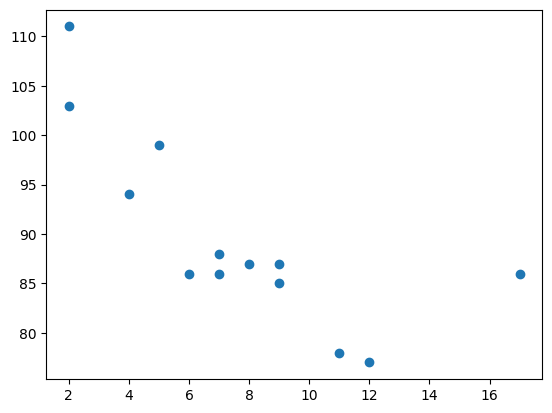

In [ ]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

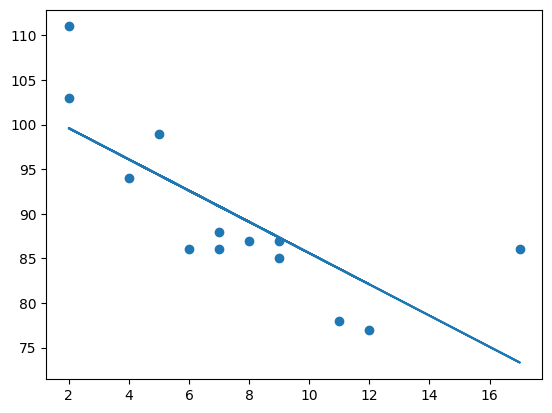

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

# scipy kütüphanesi kullanılarak linear regresyon uygulayan bir fonksiyon
slope, intercept, r, p, std_err = stats.linregress(x, y)

# x değerleri ile bir doğru çizer bu basit geometri formu y=mx+a  ile çizgi çizmektir.
def LineGenerate(x):
  return slope * x + intercept

# X in her değeri için fonksiyonu çalıştırır ve sonuçları bir listeye (arraya ) çeviri.
mymodel = list(map(LineGenerate, x))

# Datalar nokta iken regresyon sonucu bir çizgi olması için plot olarak ifade edilmiştir.
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

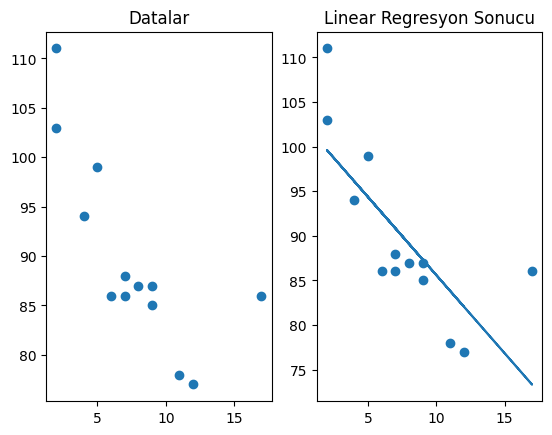

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]


plt.subplot(1,2,1)
plt.title("Datalar")
plt.scatter(x, y)

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.subplot(1,2,2)
plt.title("Linear Regresyon Sonucu")
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

Bu sistemi kullanarak bir tahmin yapalım. Aşağıdaki kod bir regresyon eğrisi çiziyor ve verdiğin değerin bu eğrideki tahmini değerini yazıyor.

In [ ]:
from scipy import stats

# X ekseninde bulunan değerler
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
# Y eksenin bulunan değerler
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def guessFunc(x):
  return slope * x + intercept

guess = guessFunc(10)

print(guess)

85.59308314937454


Peki linear regresyon her zaman kullanılır mı? 
Bunu anlamak için r değeri mevcut. Öncelikle başarılı bir örnek ile deneyelim. Akademik çalışmalarda r^2 değerinin 0.95 üzeri olması istenir. Aşağıdaki örnekte linear regresyon neredeyse harika 

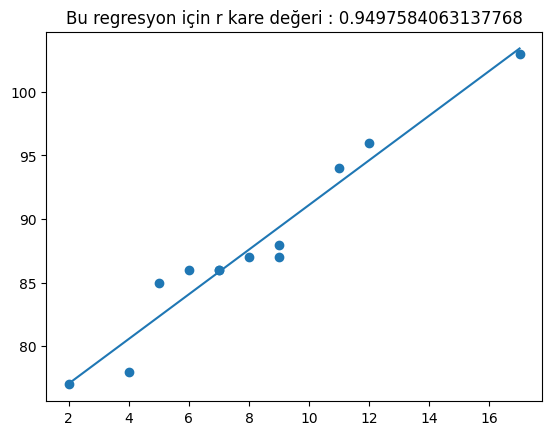

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [2, 4, 5, 6, 7, 7, 8, 9, 9, 11, 12, 17]
y = [77, 78, 85, 86, 86, 86, 87, 87, 88, 94, 96, 103]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def LineGenerate(x):
  return slope * x + intercept

mymodel = list(map(LineGenerate, x))

plt.title(f'Bu regresyon için r kare değeri : {r*r}')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

Bi alttaki örnekte ise durum o kadar parlak değil. Her method belli durumlara uygundur. Yukarıdaki örnekte çok başarılı olurken aşağıdaki örnekte o kadar iyi bir yöntem değil.

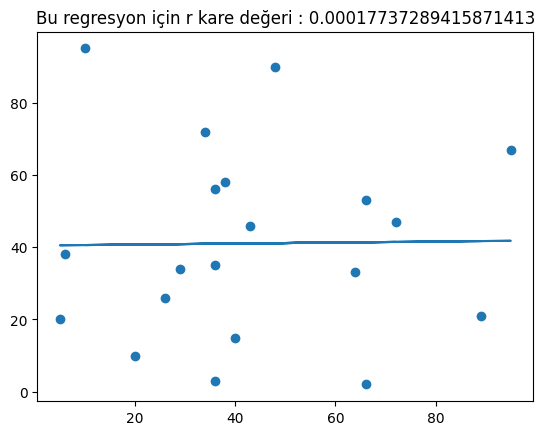

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.title(f'Bu regresyon için r kare değeri : {r*r}')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# Polinom Regresyon (Polynomial Regression)


Her zaman düz bir çizgi işe yaramıyor bu yüzden bazen bir eğer yani polinom kullanmak daha iyi olabilir. Amacımız data noktaların yakınlarından geçen bir eğri oluşturarak genel trendi yakalamak.

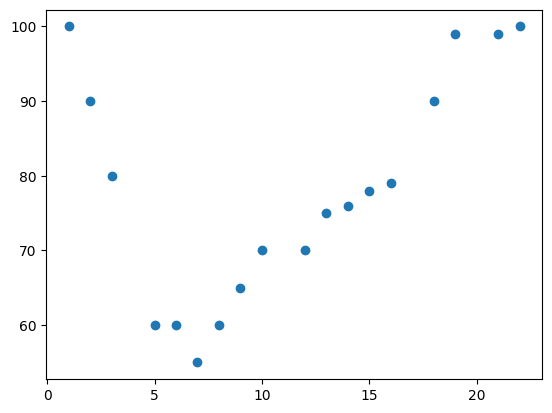

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

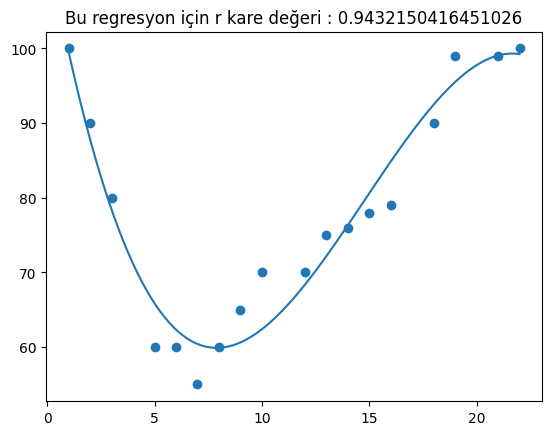

 x=8 değeri için tahmin 59.91055790910302


In [ ]:
import numpy
import matplotlib.pyplot as plt

# r kare hesaplamak için biraz destek alıyoruz
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# numpy.polyfit : x ve y datalarına bakarak 3. dereceden bir polinom çizer
# numpy.poly1d : polinomu python fonksiyonu haline getirir ve mymodel bir fonksiyon olur
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

# 1 ile 22 arasında 100 eşit aralıklı sayıyı içeren bir dizi oluşturur. 
myline = numpy.linspace(1, 22, 100)

# r kare değerini hesaplayacak  r2_score fonksiyonuna  gerçek değerler (y) ve tahminler  [mymodel(x)] verilir.
plt.title(f'Bu regresyon için r kare değeri : {r2_score(y, mymodel(x))}')
plt.scatter(x, y)

# 1 ile 22 arasında 100 sayı için tahminleri çizgi olarak çizer
plt.plot(myline, mymodel(myline))
plt.show()

guess=mymodel(8)
print(f" x=8 değeri için tahmin {guess}" )

# Multiple Regression

Bu aşamaya kadar yaptığımız regresyonlarda bir değişkenimiz vardı. Girdimizi (x eksen değerleri ) alıp çıktı tahmini  (y ekseni değerlerini) yaptığımız çalışmalar oldu. Burada girdilerimiz (x eksen değerleri ) bağımsız değişkenler oldu. Peki ya birden fazla bağımsız değişken yani girdi gerekirse?

Bu durumda multiple regresyon kullanacağız ve  bir çok girdi ile bir sonuç tahmini yapacağız. Çoklu dataya erişmek için carDataExample.csv dosyamızdan örnekler alacağız. 

Öncelikle bu verilere bi göz atalım

In [2]:
import pandas

# csv dosyasını okuyup bir dataframe elde ettik
df = pandas.read_csv("carDataExample.csv")
# head ile ilk satırları yazdırdık
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


Süper hadi volume ve weight değişkenlerinin co2 salınımına etkisini inceleyelim.

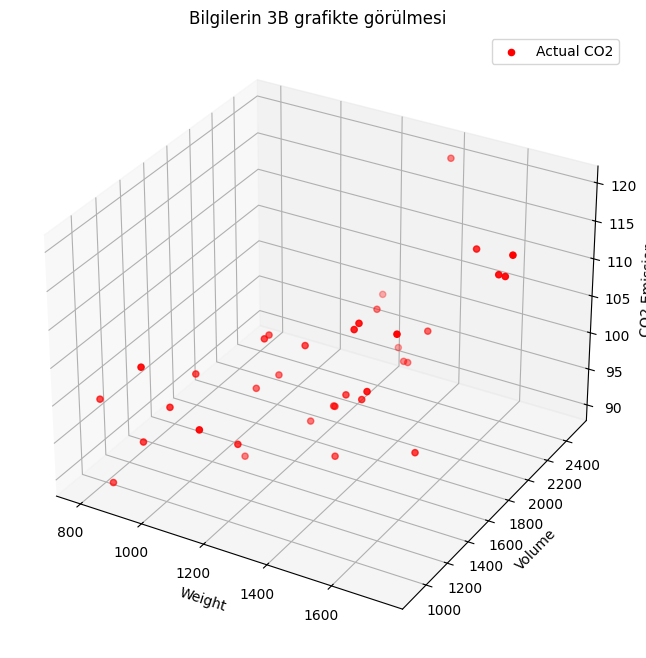

In [15]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Veriyi okuyalım
df = pd.read_csv("carDataExample.csv")

# Eksenler için weight ve volume bilgilerini alıyoruz
weight = df['Weight']
volume = df['Volume']

# çıktımız olan CO2 salınım bilgisini alıyoruz
y = df['CO2']




# grafik için boyut belirliyoruz ancak bunu değiştirmek ipynb çıktısında çok etkili olamayabilir
fig = plt.figure(figsize=(10, 8))

# 3d bir figür eklenir plota
ax = fig.add_subplot(111, projection='3d')

# 3d figür için verileri yerleştiriyoruz
ax.scatter(weight, volume, y, color='red', label='Actual CO2')

# eksen isimlerini yazıyoruz
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2 Emission')
ax.set_title('Bilgilerin 3B grafikte görülmesi')

# Show plot
plt.legend()
plt.show()

Bu dataları kullanarak  bir regresyon tahmini yapıyoruz.

In [18]:
import pandas
from sklearn import linear_model

# veriler okuyoruz
df = pandas.read_csv("carDataExample.csv")

# girdiler X  çıktı ise Y oluyor.
X = df[['Weight', 'Volume']]
y = df['CO2']

# linear model içinden linear regresyon objesi oluşturuyoruz 
regr = linear_model.LinearRegression()
# X ve y kullanılarak bir fir oluştu.
regr.fit(X, y)

# artık kendi X değerlerimizi ileterek bir tahminde bulunabiliriz.
# alttaki gibi direkt tahmin alabilirsin ama sklearn uyarı verir
#predictedCO2 = regr.predict([[2300, 1300]])

# Tahmin için veriyi pandas DataFrame olarak hazırlıyoruz çünkü 
# fit data frame ile gerçekleşti ve data frame ile tahmin vermezsen sklearn uyarı atar
new_data = pd.DataFrame([[2300, 1300]], columns=['Weight', 'Volume'])

# data frame i tahmin yapısına ateşleyince tahmin üretir
predictedCO2 = regr.predict(new_data)

print(predictedCO2)

[107.2087328]


Şimdi çok havalı bir şey yapacağız. Eğer regresyonu akademik bir şekilde kullanmak istiyorsan aşağıdaki tarzda bir sunum sana hem çok etkileyici  bir görsel sunum sağlar hem de datanın iyi anlaşılmasına yardım eder.

R² (R-kare) değeri: 0.3765564043619989
Predicted CO2 for 2300kg and 1300cm3: [107.2087328]


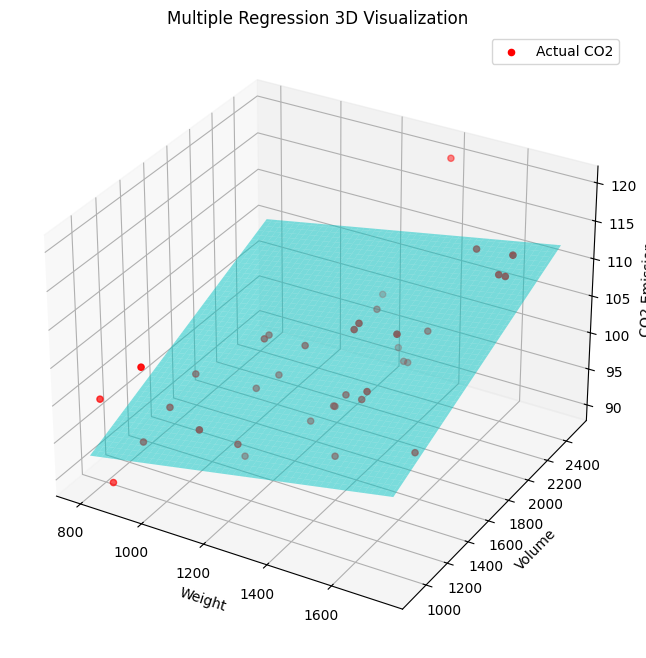

In [23]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Veriyi okuyoruz
df = pd.read_csv("carDataExample.csv")

# Bağımsız değişkenler, bunlar girdiler
X = df[['Weight', 'Volume']]
# Bağımlı değişken, bu çıktı
y = df['CO2']

# Çoklu regresyon modelini oluşturuyoruz
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Modelin R² değerini hesaplıyoruz
# bu değerin 0.95 üzeri olması akademik olarak sevilir
r_squared = regr.score(X, y)
print(f"R² (R-kare) değeri: {r_squared}")

# Yeni değerler için tahminde bulunmak istiyoruz.
# Fitting  pandas data frame üzerinde yapıldığı için tahmin edilecek verileri
# dataframe formatında tahmin yapısına iletiyoruz.
new_data = pd.DataFrame([[2300, 1300]], columns=['Weight', 'Volume'])
predictedCO2 = regr.predict(new_data)
print(f"Predicted CO2 for 2300kg and 1300cm3: {predictedCO2}")

######Tahminden Sonra Grafik Yapısı ######

# 3D grafik için veriyi hazırlıyoruz ^eksen için 3 farklı veri
weight = df['Weight']
volume = df['Volume']
# Bunu yukarıda belirttik ama hatırlatma olsun diye tekrar yazdık
y = df['CO2']

# Yüzey grafiği için meshgrid oluşturuyoruz
# regresyonda doğru çizdiğimiz gibi burda da bir sürü değer oluşturuyoruz ki 
# bunların tahminleri bize tahmin sonucunu oluşturacak.
weight_surf, volume_surf = np.meshgrid(
    np.linspace(weight.min(), weight.max(), 100),
    np.linspace(volume.min(), volume.max(), 100)
)


# Meshgrid verilerini pandas DataFrame formatına dönüştürüyoruz 
mesh_data = pd.DataFrame(np.c_[weight_surf.ravel(), volume_surf.ravel()], columns=['Weight', 'Volume'])
# Yüzey için CO2 değerlerini tahmin ediyoruz
CO2_surf = regr.predict(mesh_data)
CO2_surf = CO2_surf.reshape(weight_surf.shape)

# 3D grafiği oluşturuyoruz
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gerçek veri noktalarının scatter plot'unu çiziyoruz
ax.scatter(weight, volume, y, color='red', label='Actual CO2')

# Regresyon yüzeyini çiziyoruz
ax.plot_surface(weight_surf, volume_surf, CO2_surf, color='cyan', alpha=0.5)

# Eksen etiketleri ve başlığı belirliyoruz
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2 Emission')
ax.set_title('Multiple Regression 3D Visualization')

# Grafiği gösteriyoruz
plt.legend()
plt.show()



https://www.w3schools.com/python/python_ml_multiple_regression.asp